In [1]:
from typing import List, Optional
from autograd import grad, jacobian, elementwise_grad
import numpy as np
import matplotlib.pyplot as plt
import sys, os
from tqdm import tqdm
import math
import scipy 
from scipy import linalg
from numpy import linalg as LA

sys.path.insert(0, os.path.join(".."))
%reload_ext autoreload
%autoreload 2

In [2]:
from lib import problems as pr
from lib import optimisers as opt
from lib import utils as ut
from lib.linear_regression import LinearRegression

In [3]:
plt.rcParams['figure.figsize'] = 15, 8
# plt.rcParams['font.family'] = 'DejaVu Serif'
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 8
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['legend.fontsize'] = 18
plt.rcParams['axes.titlesize'] = 24
plt.rcParams['axes.labelsize'] = 18

# Symmetric case

In [151]:
nx=100
ny=100
problem = LinearRegression.with_parameters(nx=nx, ny=ny, L_x_mu_x=1, L_xy=0.5, mu_xy=0.05)

In [152]:
print(problem.L_xy, problem.mu_xy)

0.5000000000000003 0.05000000000000005


In [153]:
print(problem.loss(np.ones(nx), -np.ones(ny)))
print(problem.xopt)
print(problem.yopt)

10.842290958950816
[ 4.44620016e-01  1.03278124e+00 -3.32890337e-01 -1.82216209e-01
  1.97108431e-01  5.12184611e-01  4.34839121e-01  2.70181635e-02
 -6.02476034e-01  4.99298078e-01  1.81055055e-01 -3.08351297e-01
  8.77249561e-02 -4.32557625e-01  5.67245108e-01 -1.13006149e+00
 -1.29353103e-01  6.96266637e-01  2.41918090e-02 -4.70174885e-01
  1.04650659e-04  2.11591485e-01  3.33254376e-01  8.13629014e-01
 -8.68144678e-01  5.16586717e-01 -6.50332717e-01  1.36889281e+00
  2.83665749e-01 -2.82564799e-02  5.70621335e-01  2.02690922e-01
 -2.27488622e-01  6.99795658e-01 -3.91259196e-01 -1.92393265e-01
  2.61000397e-01  3.93160752e-01  5.69994148e-01  5.78864835e-02
  4.80317653e-01  2.73825778e-01 -8.30286177e-02  3.82390591e-01
 -3.00266994e-01 -5.71927985e-01 -1.87308239e-02 -4.61810106e-01
 -2.06734962e-01 -4.02370941e-01  6.06768537e-02 -1.89330517e+00
  2.08558527e-01 -3.11194041e-01  5.84066000e-01  1.18684385e-01
 -1.94145653e-01  7.47833701e-01 -7.38501094e-01 -2.68132492e-01
  1.71

In [154]:
params =  {"apdg": None,
          'lpd': None,
          'altgd': None,
          'simgd': None,
          # 'avg': None,
          'eg': None,
          'omd': None,
          'AA': None,
           "smm": None
         }

x0 = np.random.randn(nx, )
y0 = np.random.randn(ny, )
iteration = 500
methods_dict = ut.main(problem, iteration, x0.copy(), y0.copy(), params, eps=1e-15)

LPD: 100%|█████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 1021.45it/s]


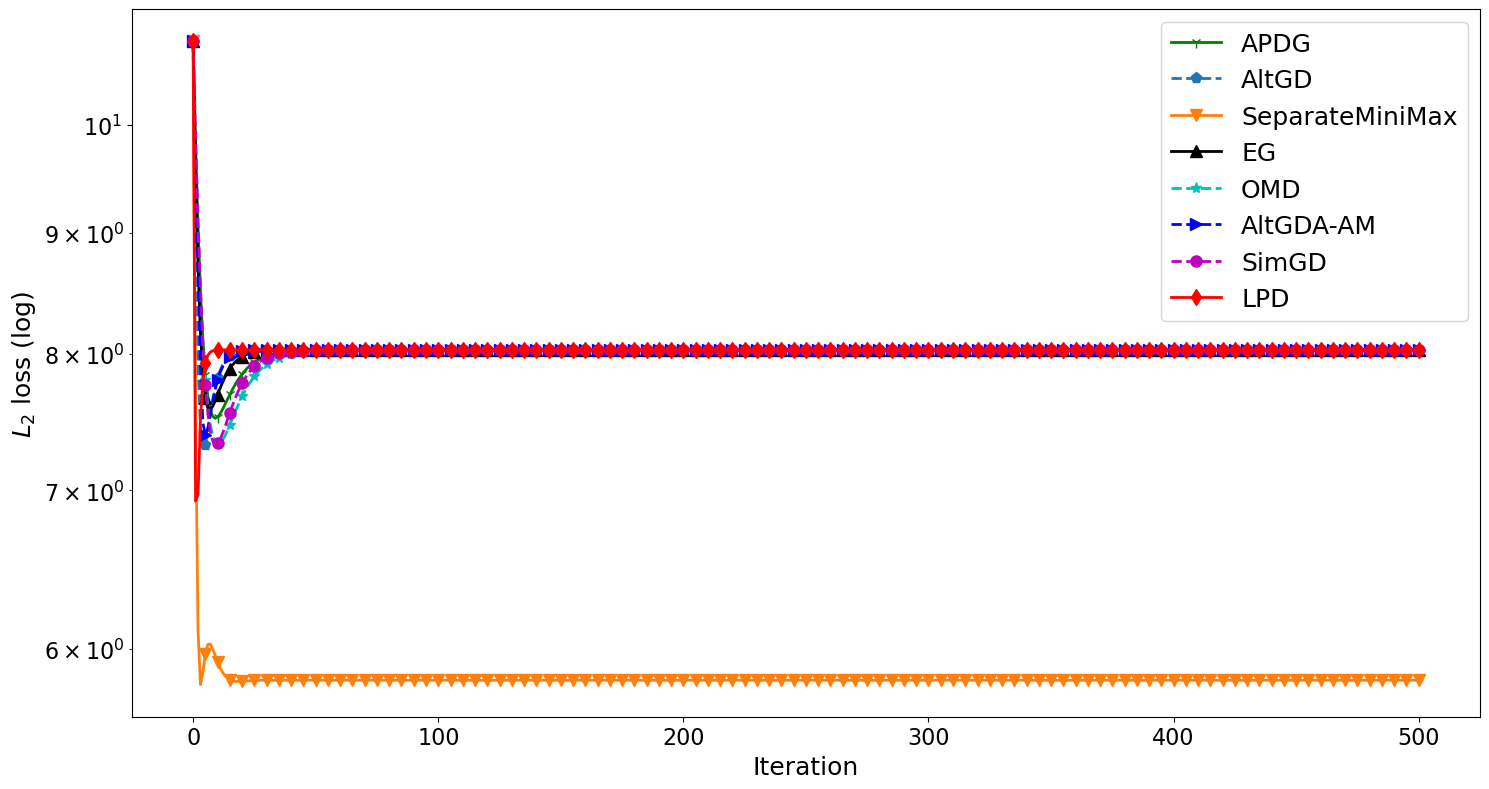

In [155]:
%matplotlib inline
plot_interval = 1
markevery=5
for method in methods_dict:
    if method not in []:
        plt.semilogy(np.arange(0, len(methods_dict[method]["loss_hist"])+plot_interval-1, plot_interval),
                     methods_dict[method]["loss_hist"][::plot_interval],
                     methods_dict[method]["marker"],
                     markevery=markevery,
                     label=method
                    )
plt.xlabel("Iteration")
plt.ylabel(r"$L_2$ loss (log)")
plt.legend()
plt.tight_layout()
# plt.savefig(os.path.join("..", "figures", f"Linear_loss_iter{iteration}_nx{nx}_ny{ny}.jpg"))
# plt.savefig(os.path.join("..", "figures", f"Linear_loss_iter{iteration}_nx{nx}_ny{ny}.pdf"))

APDG 286.6586775884036
AltGD 286.6586775884036
SeparateMiniMax 286.6586775884036
EG 286.6586775884036
OMD 286.6586775884036
AltGDA-AM 286.6586775884036
SimGD 286.6586775884036
LPD 286.6586775884036


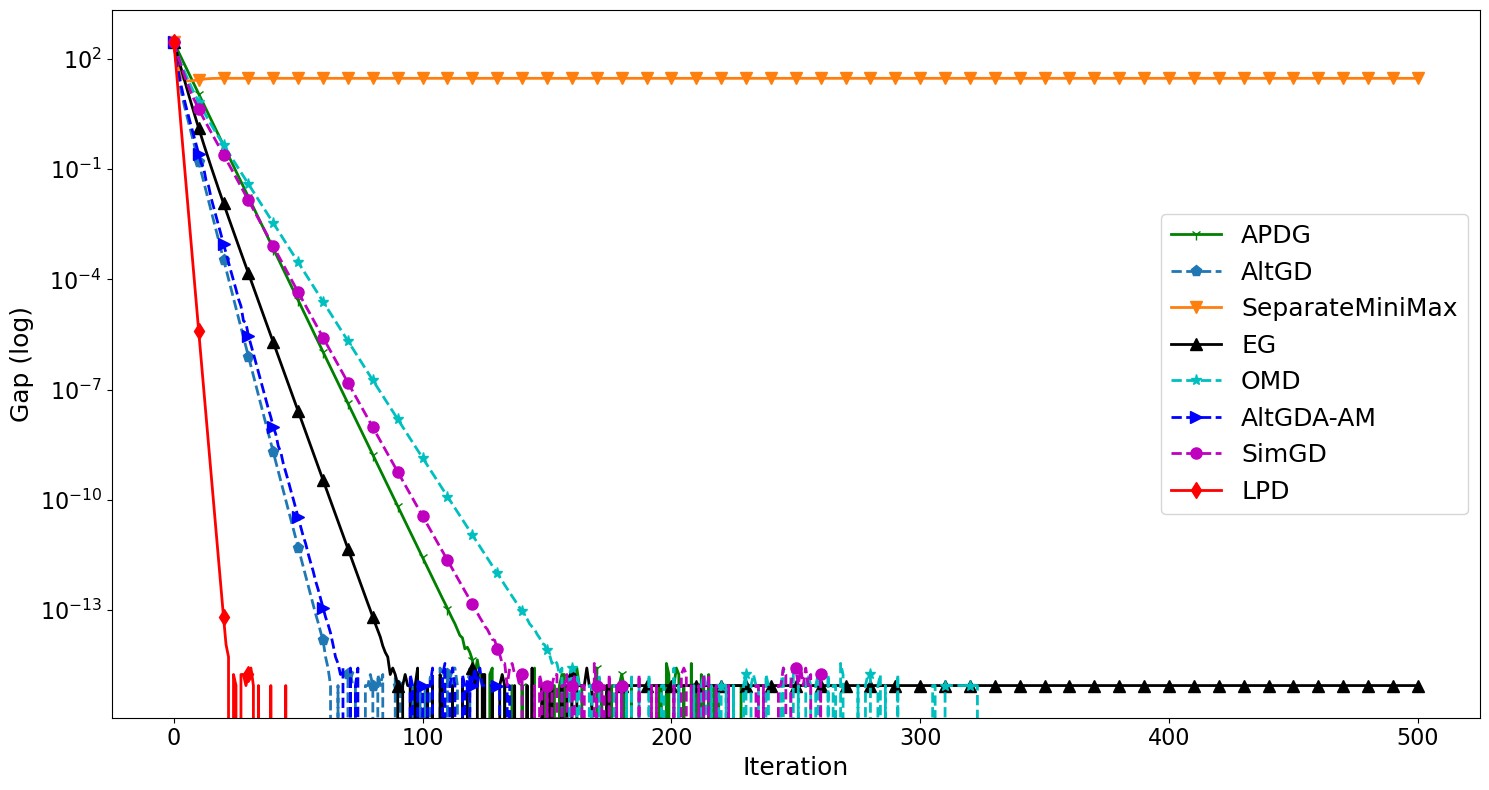

In [156]:
plot_interval = 1
markevery=10
for method in methods_dict:
    if method not in []:
        _gap =methods_dict[method]["class"].all_metrics["gap"]
        print(method, _gap[0])
        plt.semilogy(np.arange(0, len(_gap)+plot_interval-1, plot_interval),
                     _gap[::plot_interval],
                     methods_dict[method]["marker"],
                     markevery=markevery,
                     label=method
                    )
# plt.xscale('log')
plt.xlabel("Iteration")
plt.ylabel("Gap (log)")
plt.legend()
plt.tight_layout()
# plt.savefig(os.path.join("..", "figures", f"Linear_gap_iter{iteration}_nx{nx}_ny{ny}.jpg"))
# plt.savefig(os.path.join("..", "figures", f"Linear_gap_iter{iteration}_nx{nx}_ny{ny}.pdf"))

# Non-symmetric case

In [61]:
nx=15
ny=100
problem = LinearRegression.with_parameters(nx=nx, ny=ny, L_x_mu_x=1, L_xy=0.5, mu_xy=0.05)

In [62]:
print(problem.L_xy, problem.mu_xy)

0.5000000000000001 3.5246591437259847e-10


In [63]:
print(problem.loss(np.ones(nx), -np.ones(ny)))
print(problem.xopt)
print(problem.yopt)

4.454375697606811
[-0.5342671  -0.28542637 -0.64071871  0.08848741  0.63151448  0.26327158
  0.68815217 -0.34293716 -0.19353874 -0.3656252  -0.32457811  0.24137009
 -0.77910377  0.05505679  0.76451676]
[-0.78552446  0.42929655 -0.11060228  0.4728364   0.17196312 -0.57692131
  0.06493918  1.15328772 -0.13226812 -0.74924254 -0.23073125  0.64587977
  0.57411641  1.4072138  -0.54705878  0.66719521 -0.66881603 -1.03007596
  0.19372114  0.88303196 -0.72126238  0.61878783  0.91245098  0.14983052
 -0.47821407 -0.51645076 -0.83055202 -0.17035063 -0.33332591  1.42308517
 -0.04733416 -0.60262724  0.2536306   0.76345959  0.96236643  0.06119641
 -0.44051473 -0.24598625 -0.95956372  0.24428219  0.57644562 -0.08320744
  2.08442563 -0.67653004  0.15793521  0.98741868  0.02488748 -0.38961625
 -0.42406265 -0.48879923 -0.40568385 -0.23729302  0.49083583  0.17549965
 -0.58359429  0.651372    0.52511602  0.90381054 -0.97283536 -0.25673932
 -1.67141055  0.13283628 -0.08333649 -0.83151919 -0.09757576  0.0358

In [64]:
params =  {"apdg": None,
          'lpd': None,
          'altgd': None,
          'simgd': None,
          # 'avg': None,
          'eg': None,
          'omd': None,
          'AA': None,
           "smm": None
         }

x0 = np.random.randn(nx, )
y0 = np.random.randn(ny, )
iteration = 500
methods_dict = ut.main(problem, iteration, x0.copy(), y0.copy(), params, eps=1e-15)

OMD: 100%|███████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:01<00:00, 367.90it/s]


AltGDA-AM couldn't be used in such parameters' settings


LPD:  78%|███████████████████████████████████████████████████████████████████▋                   | 389/500 [00:00<00:00, 425.41it/s]C:\Users\Georgy\anaconda3\envs\pytorch_env\lib\site-packages\autograd\numpy\linalg.py:100: RuntimeWarning: invalid value encountered in double_scalars
  return expand(g / ans) * x
LPD: 100%|███████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:01<00:00, 407.74it/s]


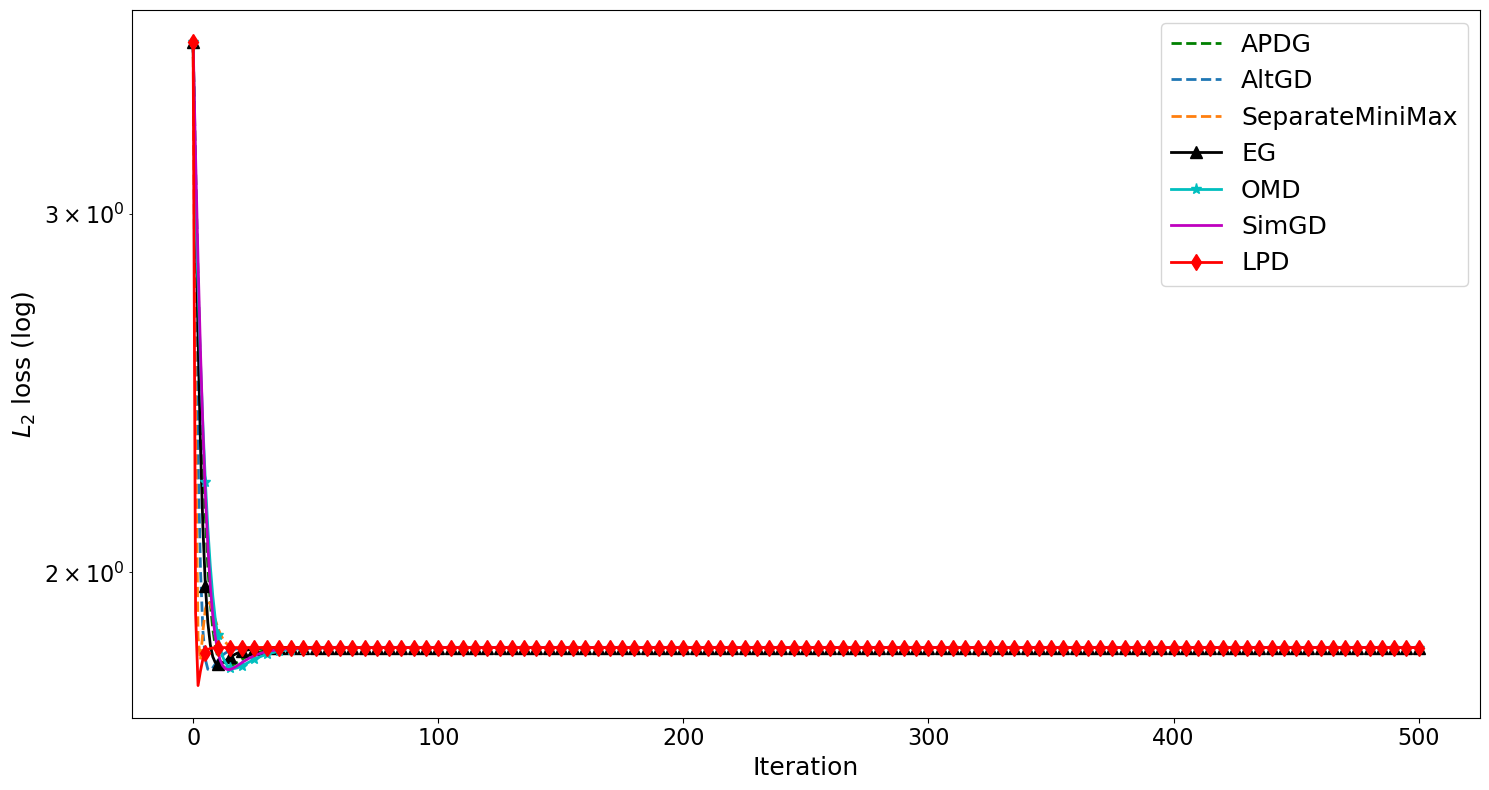

In [65]:
%matplotlib inline
plot_interval = 1
markevery=5
for method in methods_dict:
    if method not in []:
        plt.semilogy(np.arange(0, len(methods_dict[method]["loss_hist"])+plot_interval-1, plot_interval),
                     methods_dict[method]["loss_hist"][::plot_interval],
                     methods_dict[method]["marker"],
                     markevery=markevery,
                     label=method
                    )
plt.xlabel("Iteration")
plt.ylabel(r"$L_2$ loss (log)")
plt.legend()
plt.tight_layout()
plt.savefig(os.path.join("..", "figures", f"Linear_loss_iter{iteration}_nx{nx}_ny{ny}.jpg"))
plt.savefig(os.path.join("..", "figures", f"Linear_loss_iter{iteration}_nx{nx}_ny{ny}.pdf"))

APDG 132.1498462504421
AltGD 132.1498462504421
SeparateMiniMax 132.1498462504421
EG 132.1498462504421
OMD 132.1498462504421
SimGD 132.1498462504421
LPD 132.1498462504421


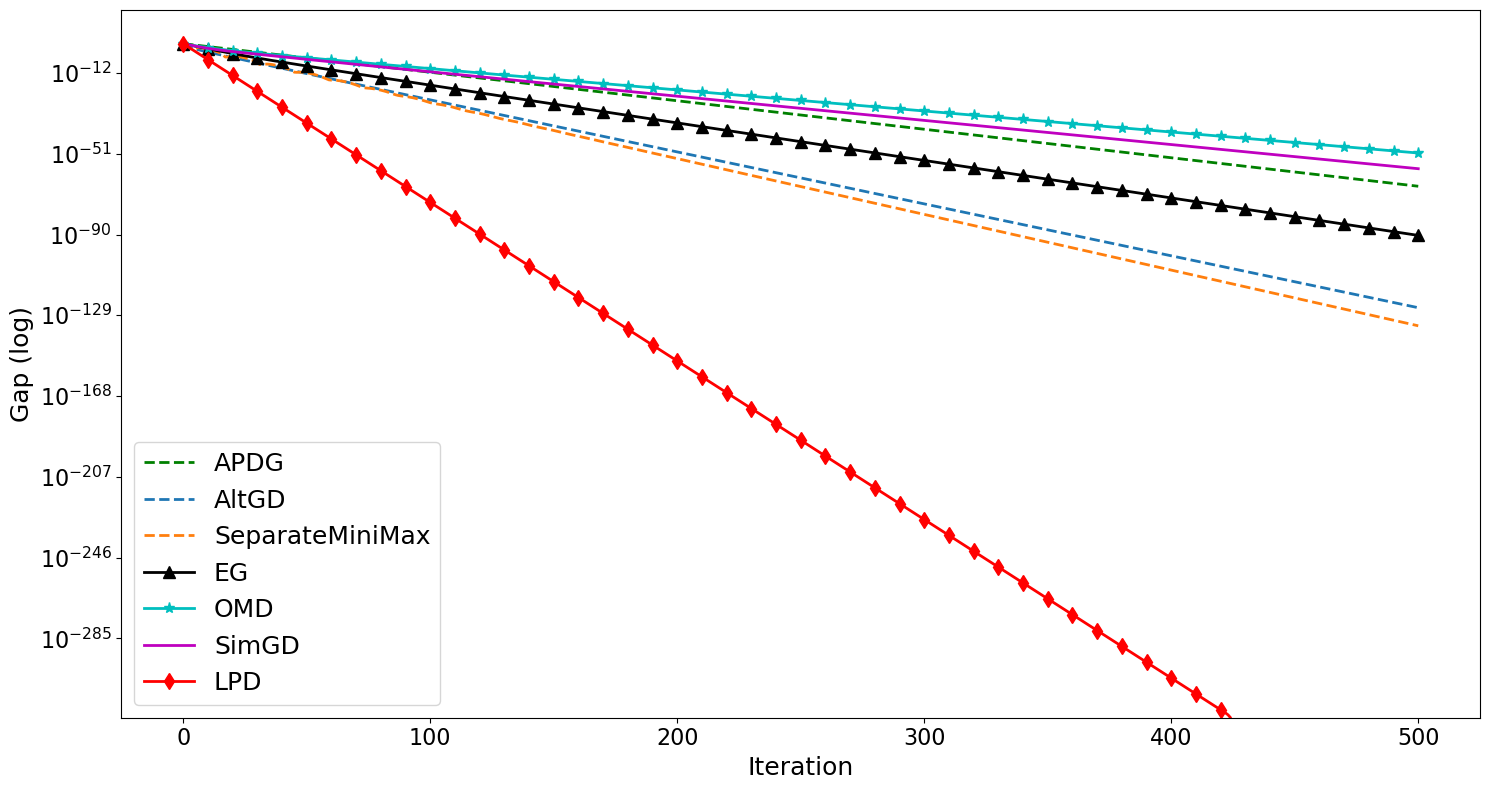

In [66]:
plot_interval = 1
markevery=10
for method in methods_dict:
    if method not in []:
        _gap =methods_dict[method]["class"].all_metrics["gap"]
        print(method, _gap[0])
        plt.semilogy(np.arange(0, len(_gap)+plot_interval-1, plot_interval),
                     _gap[::plot_interval],
                     methods_dict[method]["marker"],
                     markevery=markevery,
                     label=method
                    )
# plt.xscale('log')
plt.xlabel("Iteration")
plt.ylabel("Gap (log)")
plt.legend()
plt.tight_layout()
plt.savefig(os.path.join("..", "figures", f"Linear_gap_iter{iteration}_nx{nx}_ny{ny}.jpg"))
plt.savefig(os.path.join("..", "figures", f"Linear_gap_iter{iteration}_nx{nx}_ny{ny}.pdf"))

# Real data

In [5]:
DATA_PATH = os.path.join("..", "data", "libsvm")

In [263]:
from sklearn.datasets import load_svmlight_file
data_name = "mpg"
X_scale, y_scale = load_svmlight_file(os.path.join(DATA_PATH, data_name, f"{data_name}_scale"))
X, y = load_svmlight_file(os.path.join(DATA_PATH, data_name, data_name))

SCALED = True
if SCALED:
    X_scale = np.hstack([X_scale.toarray(), np.ones((X_scale.shape[0], 1))])
    Y_scale = y_scale[:, None]
else:
    X_scale = np.hstack([X.toarray(), np.ones((X.shape[0], 1))])
    Y_scale = y[:, None]


In [269]:
d_x, d_y = X_scale.T.shape
X_scale.T.shape

(8, 392)

In [270]:
from sklearn.linear_model import Ridge
from scipy.optimize import minimize_scalar
import sklearn.model_selection as cv

def choose_linreg_lambda(X, Y, n_splits=10, 
                         fit_intercept=False, 
                         n_multiply=False,
                         random_state=None, 
                         verbose=0):
    def cv_optim(par_lamda):
        cv_error = 0
        #kfold = cv.KFold(n_splits=n_splits, shuffle=True, random_state=random_state)
        kfold = cv.KFold(n_splits=n_splits, shuffle=True, random_state=None)
        
        for cv_train_indeces, cv_test_indeces in kfold.split(X, Y):
            X_cv_train = X[cv_train_indeces,:]
            Y_cv_train = Y[cv_train_indeces,:]
            X_cv_test = X[cv_test_indeces,:]
            Y_cv_test = Y[cv_test_indeces,:]
            
            N = X_cv_train.shape[0]
            if n_multiply:
                ridge = Ridge(alpha=par_lamda/2*N, fit_intercept=fit_intercept, random_state=random_state)
            else:
                ridge = Ridge(alpha=par_lamda/2, fit_intercept=fit_intercept, random_state=random_state)
            ridge.fit(X_cv_train, Y_cv_train)
            
            #coeffs = ridge.coef_.T
            #Y_predict = np.dot(X_cv_test, coeffs)
            
            #import pdb; pdb.set_trace()
            Y_predict = ridge.predict(X_cv_test)
            
            # compute MSE. This makes sence only if the Y data is normalized 
            # i.e. different Y dimensions have the same scale.
            cv_error += np.mean(np.power((Y_predict - Y_cv_test), 2),
                                axis=0)

        return np.sum(cv_error)

    if verbose:
        optim_output = minimize_scalar(cv_optim,
                                       bounds=(0.0, 1.),
                                       method='Bounded',
                                       options={"disp":True}
                                      )
    else:
        optim_output = minimize_scalar(cv_optim,
                                       bounds=(0.0, 1.),
                                       method='Bounded'
                                      )
    lamda = optim_output.x
    return lamda

In [308]:
RHO_scale = choose_linreg_lambda(X_scale, Y_scale, n_splits=7, 
                           fit_intercept=False, 
                           n_multiply=False)
RHO_scale

0.6180339887498948

In [339]:
from sklearn.linear_model import Ridge

ridge = Ridge(
    # alpha=LAMBDA*biased_X_train.shape[0],
    alpha=RHO_scale, 
    fit_intercept=False, copy_X=True, 
    max_iter=None, tol=0.0001, 
    solver='auto',
    random_state=None
)

ridge.fit(X_scale, Y_scale.ravel())
X_OPT = ridge.coef_.T
problem_n = LinearRegression(l=RHO_scale, A=X_scale, y=Y_scale.squeeze(),
                             xopt=X_OPT, 
                            )
x0 = problem_n.xopt + np.random.randn(d_x, )
y0 = problem_n.yopt + np.random.randn(d_y, )

In [340]:
print(f"L_x={problem_n.L_x:.3}", f"mu_x={problem_n.mu_x:.3}")
print(f"L_xy={problem_n.L_xy:.3}", f"mu_xy={problem_n.mu_xy:.3}")
print(f"L_yx={problem_n.L_yx:.3}", f"mu_yx={problem_n.mu_yx:.3}")
print(f"L_y={problem_n.L_y:.3}", f"mu_y={problem_n.mu_y:.3}")

L_x=0.618 mu_x=0.618
L_xy=25.6 mu_xy=1.4e-09
L_yx=25.6 mu_yx=1.97
L_y=2.0 mu_y=2.0


In [341]:
params = {
    "apdg": None,
          'altgd': None,
          'lpd': None,
          'simgd':  None,
    #       # 'avg':  None,
          'eg': None,
          'smm': None,
          'omd': None,
          # 'foam': None,
          # "accel-eg": None,
          # 'AA': {"lr": 1 / (2*L), 
          #        "k": 10,
          #        "type2": True,
          #        "reg": 1e-10,
          #        "gamma": 1e-26
          #       }
         }
iteration = 90
methods_dict = ut.main(problem_n, iteration,
                               x0.copy(), y0.copy(),
                               params, eps=1e-3, verbose=0)

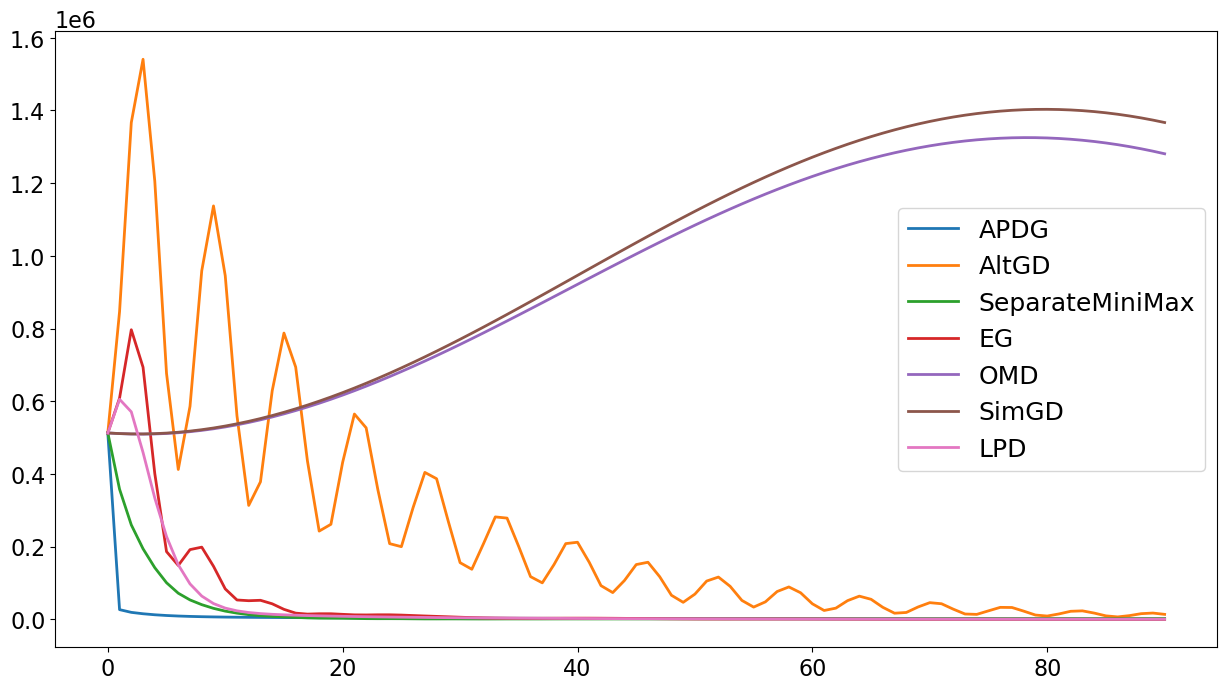

In [342]:
for method in methods_dict:
    plt.plot(methods_dict[method]["class"].all_metrics["gap"], label=method)
plt.legend();

In [343]:
params = {
    "apdg": None,
          'altgd': None,
          'lpd': None,
          'simgd':  None,
    #       # 'avg':  None,
          'eg': None,
          # 'smm': None,
          'omd': None,
          # 'foam': None,
          "accel-eg": None,
          # 'AA': {"lr": 1 / (2*L), 
          #        "k": 10,
          #        "type2": True,
          #        "reg": 1e-10,
          #        "gamma": 1e-26
          #       }
         }

metric_lists_ns = {
    'eps_x': [],
    'APDG': [],
    'AltGD': [],
    'SimGD': [],
    'EG': [],
    "LPD": [],
    # "SeparateMiniMax": [],
    "OMD": [],
    # "FOAM": [],
    "AcceleratedEG": [],
    'initial': [],
}

iteration = 1000
N_RUNS = 1

for _run in range(N_RUNS):
    for key in metric_lists_ns:
        metric_lists_ns[key].append([])

    for _eps in tqdm(np.logspace(1e-3, 1e-1, num=5),
                      position=0, desc=f"RUN {_run}:"):
        methods_dict = ut.main(problem_n, iteration,
                               x0.copy(), y0.copy(),
                               params, eps=_eps, verbose=0)
        metric_lists_ns['eps_x'][-1].append(_eps)
        metric_lists_ns['initial'][-1].append(sum(methods_dict["APDG"]["class"].all_metrics["step_complexity"]))
        for method in methods_dict:
            metric_lists_ns[method][-1].append(sum(methods_dict[method]["class"].all_metrics["step_complexity"]))

for key in metric_lists_ns:
    metric_lists_ns[key] = np.array(metric_lists_ns[key])
metric_lists_ns['eps_x'] = metric_lists_ns['eps_x'].mean(axis=0)

RUN 0::   0%|                                                                                    | 0/5 [00:00<?, ?it/s]C:\Users\Georgy\Desktop\PhD\Sirius_intensive\code\experiments\..\lib\base_opt.py:108: RuntimeWarning: overflow encountered in double_scalars
  self.grad_norm_0 = np.sqrt(self.x.dot(self.x)**2 + self.y.dot(self.y)**2)
C:\Users\Georgy\Desktop\PhD\Sirius_intensive\code\experiments\..\lib\linear_regression.py:106: RuntimeWarning: overflow encountered in matmul
  return self.f(x) + y.T @ self.A @ x - self.g(y)
C:\Users\Georgy\Desktop\PhD\Sirius_intensive\code\experiments\..\lib\linear_regression.py:103: RuntimeWarning: overflow encountered in matmul
  return (y - self._y).T @ (y - self._y)
C:\Users\Georgy\Desktop\PhD\Sirius_intensive\code\experiments\..\lib\linear_regression.py:106: RuntimeWarning: invalid value encountered in double_scalars
  return self.f(x) + y.T @ self.A @ x - self.g(y)
RUN 0::   0%|                                                                       

p_func=nan, d_func=nan,gap=nan


ValueError: Gap is negative!

In [ ]:
for method in methods_dict:
    if method != "AcceleratedEG":
        plt.plot(methods_dict[method]["class"].all_metrics["gap"], label=method)
plt.legend();

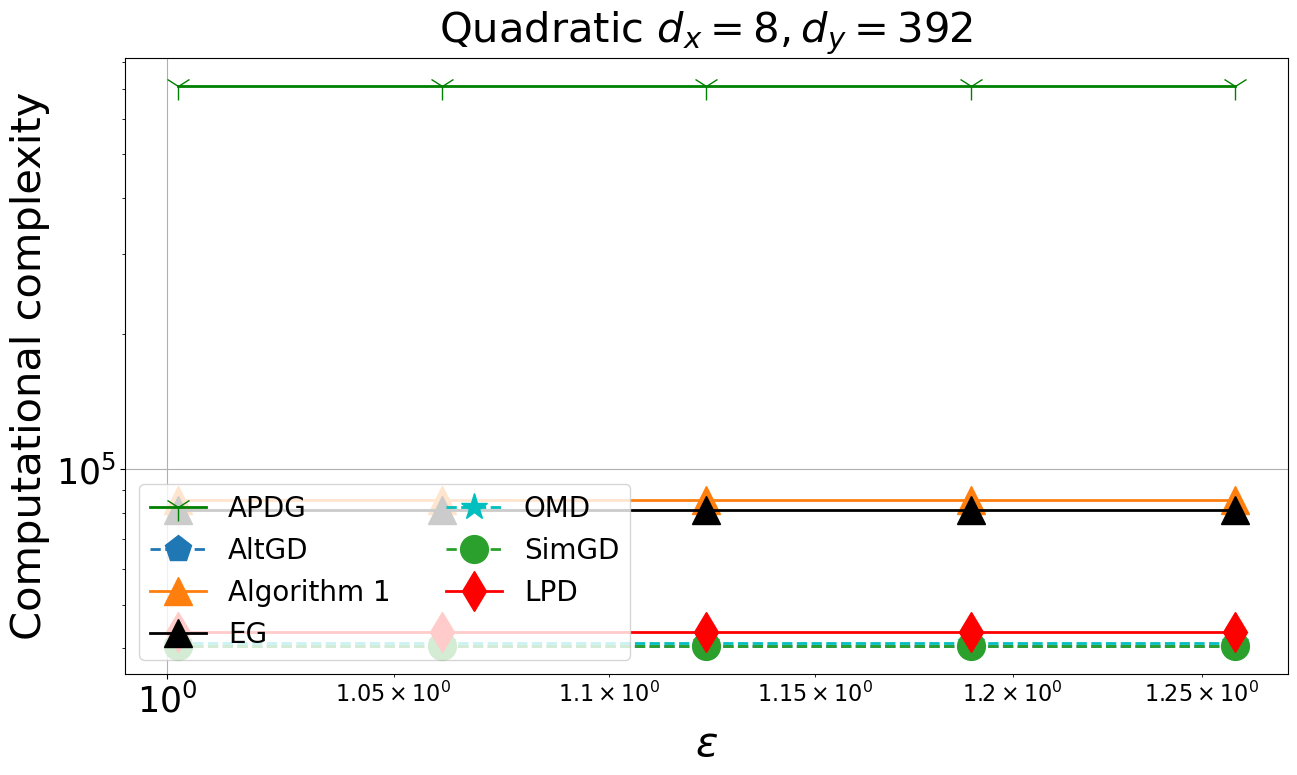

In [337]:
K = len(metric_lists_ns['eps_x'])
MARK_EVERY = K // 7 + 1

# methods_dict["SeparateMiniMax"]["marker"] = "-v"
methods_dict["SimGD"]["marker"] = "--o"
# methods_dict["FOAM"]["marker"] = "-X" 
methods_dict["AltGD"]["marker"] = "--p" 
methods_dict["OMD"]["marker"] = 'c--*'
methods_dict["APDG"]["marker"] = 'g-1'

for method in methods_dict:
    if method != "FOAM":
        if method == "AcceleratedEG":
            _method_label = "Algorithm 1"
        else:
            _method_label = method
        plt.loglog(metric_lists_ns['eps_x'],
                   np.mean(metric_lists_ns[method], axis=0),
                   methods_dict[method]["marker"], label=_method_label,
                   markevery=(0, MARK_EVERY),
                   markersize=20
                  )

plt.xlabel(r"$\epsilon$", fontsize=30)
plt.ylabel(r"Computational complexity", fontsize=30)
plt.title(r"Quadratic $d_x = $" + f"{d_x}" + "$, d_y = $"+ f"{d_y}", fontsize=30)

# plt.xticks(metric_lists['eps_x'][::MARK_EVERY], fontsize=25)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

plt.legend(loc="lower left", ncol=2, fontsize=20)
plt.grid()
plotname = f"Quadratic_eps_comp_complexity_dx{d_x}_dy{d_y}"
# plt.savefig(os.path.join("..", "figures", f'{plotname}.pdf'), bbox_inches='tight')
# plt.savefig(os.path.join("..", "figures", f'{plotname}.png'), bbox_inches='tight')
plt.show()
plt.close()